# Backorder Prediction

# Description:

Source : https://github.com/rodrigosantis1/backorder_prediction/blob/master/dataset.rar

# Problem Statement :

we have to classify if a product goes on backorder or not based on data from inventory management

# Business objectives and constraints

* No Latency requirement 
* Retraining is required since it is a time series data

# Machine Learning Problem Formulation

Data overview : we have two file train and test we are going to combine both and do the train test split because of high missing values 

Type of machine learning problem : Binary classification

# Performance Metric:

* Macro F1 Score:  macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally),we have imbalance data hence we need to consider both the classes
* AUC-ROC Score : AUC score signifies a model's abiility to differentiate between positive and negative classes, a better AUC score defines models ability to detect a class with some score giving us the probability to how better the model is
* Area under Precision - Recall curve : it will be used to select the threshold between precision and recall

In [1]:
#importing librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.graphics.gofplots as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import Patch
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.tree import DecisionTreeRegressor
import joblib
import pickle
from joblib import dump,load

In [2]:
train_data=pd.read_csv('/Users/lenovo/downloads/Kaggle_Training_Dataset_v2.csv')
test_data=pd.read_csv('/Users/lenovo/downloads/Kaggle_Test_Dataset_v2.csv') #test and train data are in different files

C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
train_data.drop(train_data.tail(1).index,inplace=True) #dropping last row 

In [4]:
test_data.drop(test_data.tail(1).index,inplace=True) #dropping last row for test data

In [5]:
data = train_data.append(test_data,ignore_index=True)

In [6]:
data.shape

(1929935, 23)

In [7]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [8]:
data.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1929930,3526987,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929931,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929932,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929933,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929934,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [127]:
print("{} columns".format(len(data.columns)))
print("{} rows".format(len(data)))
data.nunique()

22 columns
1929935 rows


national_inv         15903
lead_time               32
in_transit_qty        5543
forecast_3_month      8293
forecast_6_month     11788
forecast_9_month     14523
sales_1_month         6088
sales_3_month        11149
sales_6_month        15813
sales_9_month        19581
min_bank              5909
potential_issue          2
pieces_past_due        874
perf_6_month_avg       101
perf_12_month_avg      101
local_bo_qty           686
deck_risk                2
oe_constraint            2
ppap_risk                2
stop_auto_buy            2
rev_stop                 2
went_on_backorder        2
dtype: int64

1. There are 23 columns and 16,87,860 Features
2. 22 are Independt Features and 1 is dependent feature(i.e Went on Back Order)
3. 15 Features are numeric and 7 are categorical features
4. Last row contains all NaN values 

# EDA

In [126]:
data['went_on_backorder'].value_counts()#imbalanced dataset as we know that this is our dependent or output(Y) variable

No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64

In [121]:
print('not on Backorder=', round(data['went_on_backorder'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('on Backorder=', round(data['went_on_backorder'].value_counts()[1]/len(data) * 100,2), '% of the dataset')
data.to_numpy()

not on Backorder= 99.28 % of the dataset
on Backorder= 0.72 % of the dataset


array([[0.0, nan, 0.0, ..., 1, 0, 'No'],
       [2.0, 9.0, 0.0, ..., 1, 0, 'No'],
       [2.0, nan, 0.0, ..., 1, 0, 'No'],
       ...,
       [13.0, 12.0, 0.0, ..., 1, 0, 'No'],
       [10.0, 12.0, 0.0, ..., 1, 0, 'No'],
       [2913.0, 12.0, 0.0, ..., 1, 0, 'No']], dtype=object)

The data is Highly imbalanced as we can the Majority Class i.e is went_on_backorder=No is 99.28 % and went on backorder is 0.72%

# Info of Data and all Null Values

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929935 entries, 0 to 1929934
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   national_inv       float64
 1   lead_time          float64
 2   in_transit_qty     float64
 3   forecast_3_month   float64
 4   forecast_6_month   float64
 5   forecast_9_month   float64
 6   sales_1_month      float64
 7   sales_3_month      float64
 8   sales_6_month      float64
 9   sales_9_month      float64
 10  min_bank           float64
 11  potential_issue    object 
 12  pieces_past_due    float64
 13  perf_6_month_avg   float64
 14  perf_12_month_avg  float64
 15  local_bo_qty       float64
 16  deck_risk          int32  
 17  oe_constraint      int32  
 18  ppap_risk          int32  
 19  stop_auto_buy      int32  
 20  rev_stop           int32  
 21  went_on_backorder  object 
dtypes: float64(15), int32(5), object(2)
memory usage: 287.1+ MB


In [123]:
data.isnull().sum() #finding the null values

national_inv              0
lead_time            115617
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg     148579
perf_12_month_avg    140025
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

1. The data consits of 15 numeric feature of float64 Data type
2. The Column lead_time has few NaN values
3. The first column sku(stock keeping unit) displays different id of products which doesnt seem very usefull so we need to drop it

# Statisical Measures of the Data of all Numeric Columns

In [14]:
data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


1.  From the Pandas Describre() Method we get insight of the data and we can see the Mean is Larger than 75th percentile of the data ,so the Data is Right skewed 
2. The lead_time has many missing values hence it is left skewed.
3. The Difference between max value and 75th percentile value is very High which predicts data might have some outliers
4. perf_6_month_avg and perf_12_month_avg has max value as 1 and min Value as -99, i.e Missing values are replaced with -99

As the First columns doesnt seems to usefull, we can drop the first column

# Box Plot to Find the outliers 

<AxesSubplot:xlabel='went_on_backorder', ylabel='national_inv'>

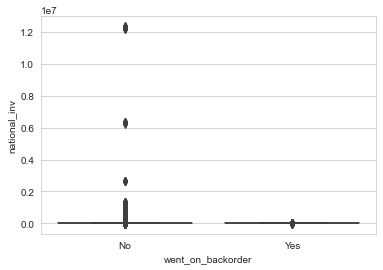

In [15]:
sns.set_style("whitegrid")#lets do a boxplot of features , we are using different plots for different features as value ranges are different
sns.boxplot(x='went_on_backorder',y ='national_inv', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='lead_time'>

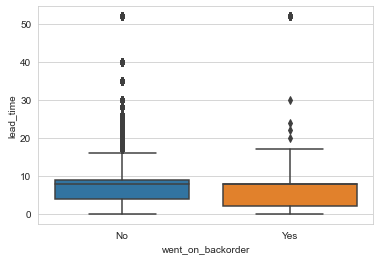

In [16]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='lead_time', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='in_transit_qty'>

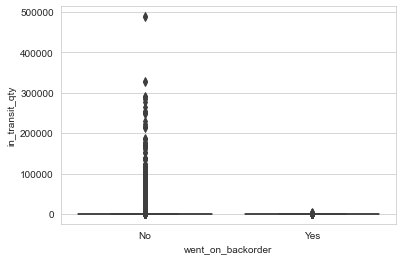

In [17]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='in_transit_qty', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_3_month'>

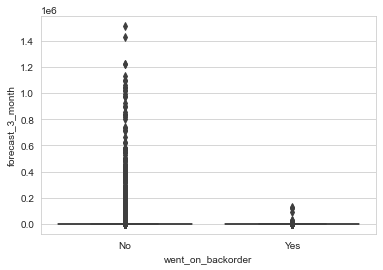

In [18]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='forecast_3_month', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_6_month'>

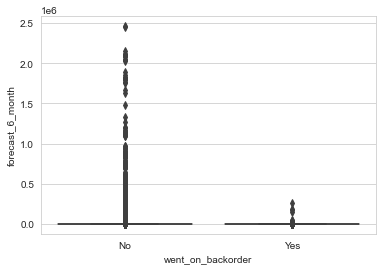

In [19]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='forecast_6_month', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_9_month'>

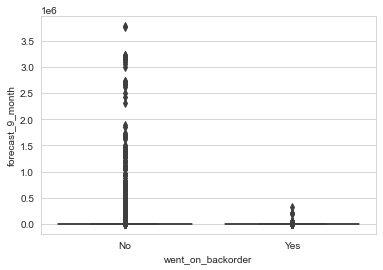

In [20]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='forecast_9_month', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='min_bank'>

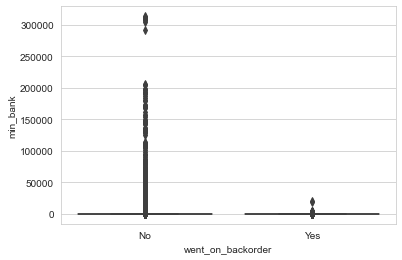

In [21]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='min_bank', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_1_month'>

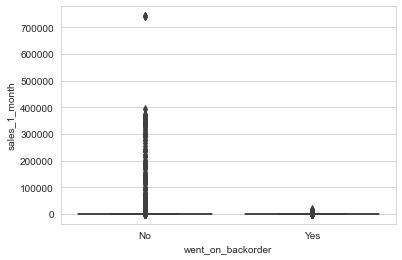

In [22]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='sales_1_month', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_3_month'>

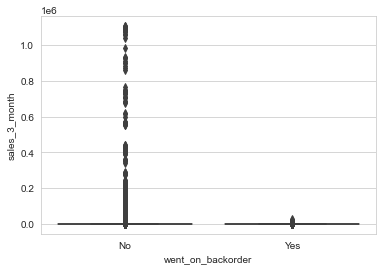

In [23]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='sales_3_month', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='pieces_past_due'>

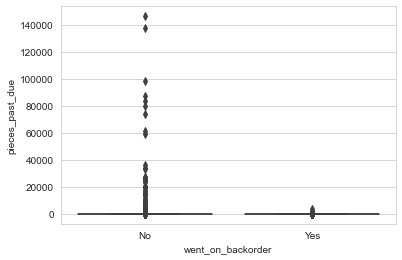

In [24]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='pieces_past_due', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_6_month'>

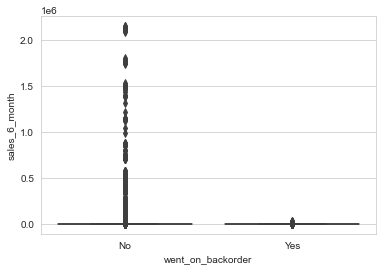

In [25]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='sales_6_month', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_9_month'>

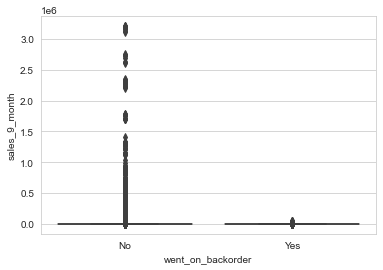

In [26]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='sales_9_month', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='perf_6_month_avg'>

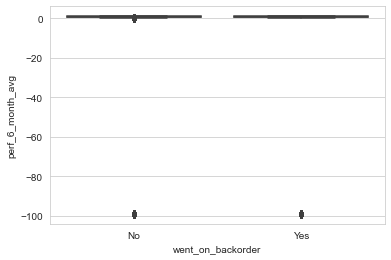

In [27]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='perf_6_month_avg', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='perf_12_month_avg'>

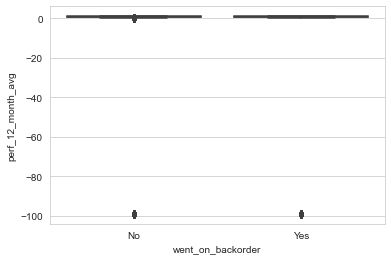

In [28]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='perf_12_month_avg', data = data)

<AxesSubplot:xlabel='went_on_backorder', ylabel='local_bo_qty'>

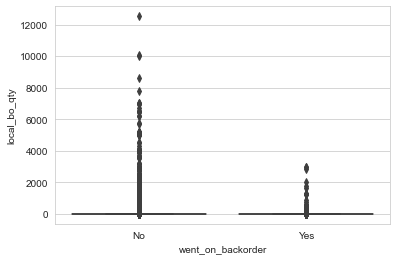

In [29]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='local_bo_qty', data = data)

1. The values for all columns expect Lead_time is high hence the boxplot is not visible
2. We need to take certain range of data to get Boxplot visibilty
3. let us consider if we take 0 to 95% percentile of data so that we get boxplot visibilty
4. Max value is dropped from 10^7 to range of 350-400.

Text(0.5, 1.0, 'Box Plot of in_transit_qty from 0 to 90th percentile')

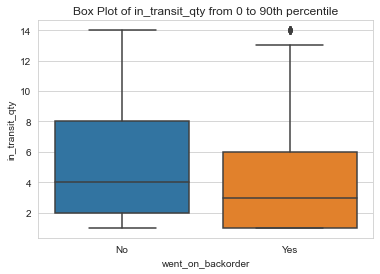

In [30]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='in_transit_qty', data = data[(data.in_transit_qty < data.in_transit_qty.quantile(0.90))&(data.in_transit_qty > data.in_transit_qty.quantile(0.00))]).set_title('Box Plot of in_transit_qty from 0 to 90th percentile')

In [31]:
data['in_transit_qty'].describe()

count    1.929935e+06
mean     4.306440e+01
std      1.295420e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.894080e+05
Name: in_transit_qty, dtype: float64

1. The IQR for the in_transit_qty feature is very small and there are many outliers that did not go in back order
2. The IOR are for both class are almost overlapping
3. Reduced the data to 90th percentile and range was dropped to upto 16 
4. The box plot of in_transit_qty indicates that if the value is less than 2 then it goes on backorder and if greater than 6 than it did not go on backorder

Text(0.5, 1.0, 'Box Plot of forecast_3_month from 0 to 90th percentile')

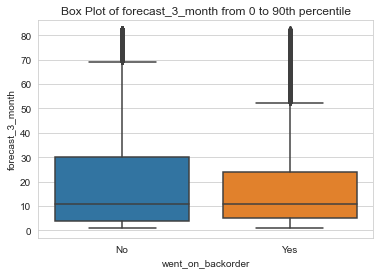

In [32]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='forecast_3_month', data = data[(data.forecast_3_month < data.forecast_3_month.quantile(0.90))&(data.forecast_3_month > data.forecast_3_month.quantile(0.00))]).set_title('Box Plot of forecast_3_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box Plot of forecast_6_month from 0 to 90th percentile')

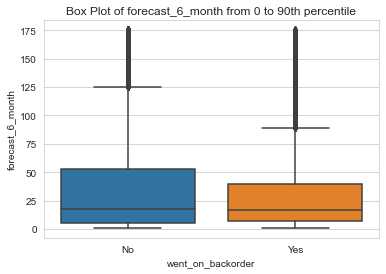

In [33]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='forecast_6_month', data = data[(data.forecast_6_month < data.forecast_6_month.quantile(0.90))&(data.forecast_6_month > data.forecast_6_month.quantile(0))]).set_title('Box Plot of forecast_6_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box Plot of forecast_9_month from 0 to 80th percentile')

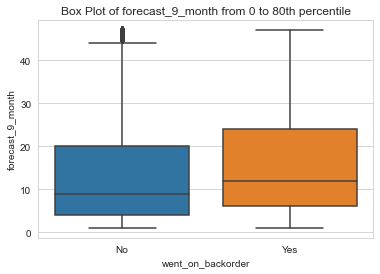

In [34]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='forecast_9_month', data = data[(data.forecast_9_month < data.forecast_9_month.quantile(0.80))&(data.forecast_9_month > data.forecast_9_month.quantile(0))]).set_title('Box Plot of forecast_9_month from 0 to 80th percentile')

1. The Boxplot for all three forecast feautre is almost similiar
2. It contains Outliers in all three features 
3. if we consider only 80th percentile of data then it is observed that the forecast is higher than there is a chance of going on backorder

Text(0.5, 1.0, 'Box Plot of sales_1_month from 0 to 90th percentile')

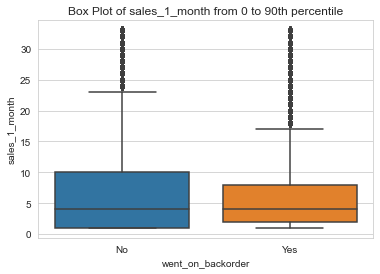

In [35]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='sales_1_month', data = data[(data.sales_1_month < data.sales_1_month.quantile(0.90))&(data.sales_1_month > data.sales_1_month.quantile(0))]).set_title('Box Plot of sales_1_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box Plot of sales_3_month from 0 to 90th percentile')

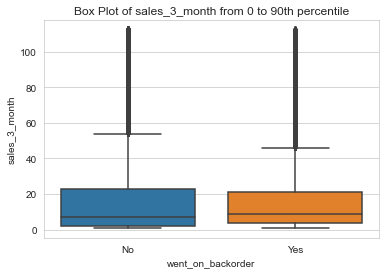

In [36]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='sales_3_month', data = data[(data.sales_3_month < data.sales_3_month.quantile(0.90))&(data.sales_3_month > data.sales_3_month.quantile(0))]).set_title('Box Plot of sales_3_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box Plot of sales_6_month from 0 to 80th percentile')

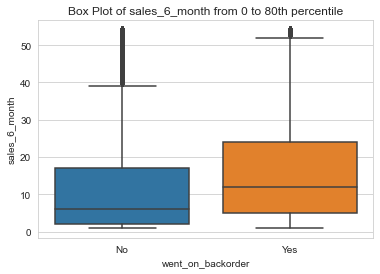

In [37]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='sales_6_month', data = data[(data.sales_6_month < data.sales_6_month.quantile(0.80))&(data.sales_6_month > data.sales_6_month.quantile(0))]).set_title('Box Plot of sales_6_month from 0 to 80th percentile')

1. The Boxplot for all three sale feautre is almost similar and also similar to forecast
2. It contains Outliers in all three features 
3. if we consider only 80th percentile of data then it is observed that if the sale is higher than there is a chance of going on backorder

Text(0.5, 1.0, 'Box Plot of min_bank from 0 to 90th percentile')

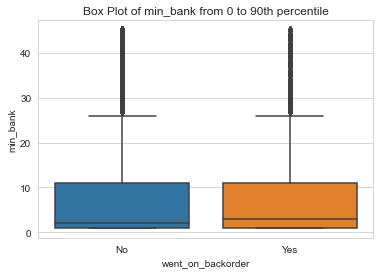

In [38]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='min_bank', data = data[(data.min_bank < data.min_bank.quantile(0.90))&(data.min_bank > data.min_bank.quantile(0))]).set_title('Box Plot of min_bank from 0 to 90th percentile')

Text(0.5, 1.0, 'Box Plot of min_bank from 0 to 80th percentile')

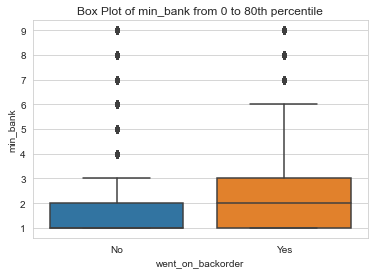

In [39]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='min_bank', data = data[(data.min_bank < data.min_bank.quantile(0.80))&(data.min_bank > data.min_bank.quantile(0))]).set_title('Box Plot of min_bank from 0 to 80th percentile')

1. Min bank balance also has many outlier after 75th percentile
2. this feature represents amount of stock, if the amount is high is is likely possible that it wont go on back order
3. as we decrease to 80th percentile we can see it gets on backorder

In [40]:
data['pieces_past_due'].describe()

count    1.929935e+06
mean     2.016193e+00
std      2.296112e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.464960e+05
Name: pieces_past_due, dtype: float64

In [41]:
data[(data['pieces_past_due']==0)&(data['went_on_backorder']=='No')].describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.888855e+06,1.773678e+06,1.888855e+06,1.888855e+06,1.888855e+06,1.888855e+06,1.888855e+06,1.888855e+06,1.888855e+06,1.888855e+06,1.888855e+06,1888855.0,1.888855e+06,1.888855e+06,1.888855e+06
mean,4.962708e+02,7.904582e+00,4.028005e+01,1.614315e+02,3.146851e+02,4.622396e+02,5.110505e+01,1.608023e+02,3.148100e+02,4.834775e+02,4.947795e+01,0.0,-7.018097e+00,-6.576514e+00,5.685169e-01
std,2.986424e+04,7.107703e+00,1.254210e+03,4.557156e+03,8.664866e+03,1.253174e+04,1.762919e+03,4.702523e+03,8.551360e+03,1.319510e+04,1.187159e+03,0.0,2.679074e+01,2.607467e+01,3.391928e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.400000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.0,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,3.000000e+00,1.000000e+01,1.700000e+01,4.000000e+00,1.400000e+01,2.900000e+01,4.400000e+01,3.000000e+00,0.0,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.157024e+06,3.232820e+06,7.417740e+05,1.105478e+06,2.133557e+06,3.205172e+06,3.133190e+05,0.0,1.000000e+00,1.000000e+00,1.253000e+04


1. Only 1 % of values have non zero values
2. Spread is very high for negative class

Text(0.5, 1.0, 'Box Plot of perf_6_month_avg from 0 to 90th percentile')

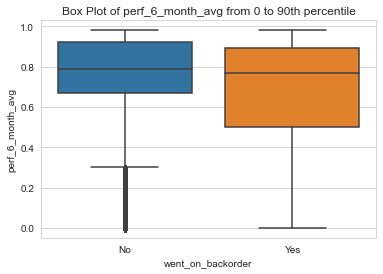

In [42]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='perf_6_month_avg', data = data[(data.perf_6_month_avg < data.perf_6_month_avg.quantile(0.90))&(data.perf_6_month_avg > data.perf_6_month_avg.quantile(0))]).set_title('Box Plot of perf_6_month_avg from 0 to 90th percentile')

Text(0.5, 1.0, 'Box Plot of perf_12_month_avg from 0 to 90th percentile')

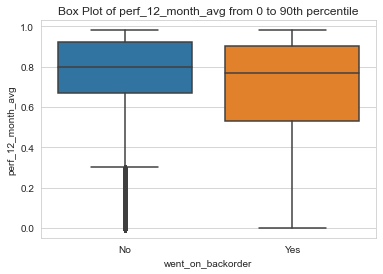

In [43]:
sns.set_style("whitegrid")
sns.boxplot(x='went_on_backorder',y ='perf_12_month_avg', data = data[(data.perf_12_month_avg < data.perf_12_month_avg.quantile(0.90))&(data.perf_12_month_avg > data.perf_12_month_avg.quantile(0))]).set_title('Box Plot of perf_12_month_avg from 0 to 90th percentile')

We can see from the boxplot that which underperformed went on backorder

In [44]:
data['local_bo_qty'].describe()

count    1.929935e+06
mean     6.537039e-01
std      3.543230e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.253000e+04
Name: local_bo_qty, dtype: float64

In [45]:
data.local_bo_qty.quantile(0.98)

0.0

In [46]:
data.local_bo_qty.quantile(0.99)

1.0

As seen earlier this feature has also 1% of non zero data

# Conclusion

1. From the boxplot we can draw a conclusion that local_bo quantity and pieces past can be ignored as it has only 1 % of non zero data
2. Most of the data is right Skewed we need to apply feature engineering on it 
3. we can consider only 90th percentile of the data
4. Sale and forecast and performance have same feature so we can select any one group of it

went_on_backorder        No       Yes
rev_stop                             
No                 0.992755  0.007245
Yes                0.995232  0.004768


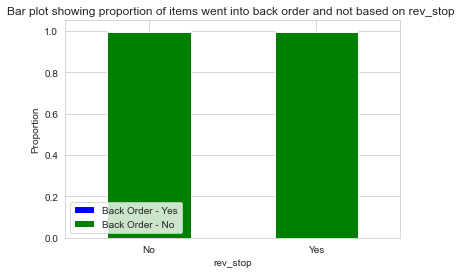

In [47]:
counts_df = data.groupby(["rev_stop", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)
fig, ax = plt.subplots()
proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
ax.set_xlabel("rev_stop")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on rev_stop ")
color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

1. No order is on back order if the rev_stop is Yes

went_on_backorder        No       Yes
deck_risk                            
No                 0.992169  0.007831
Yes                0.994771  0.005229


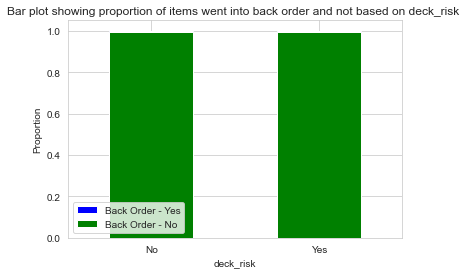

In [48]:
counts_df = data.groupby(["deck_risk", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)
fig, ax = plt.subplots()
proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
ax.set_xlabel("deck_risk")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on deck_risk ")
color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

Deck risk Doesnt seem usefull as the proportion for borh class is equal

went_on_backorder        No       Yes
oe_constraint                        
No                 0.992759  0.007241
Yes                0.969178  0.030822


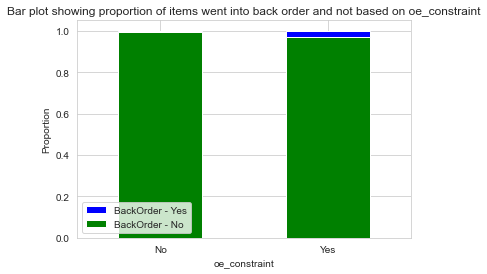

In [49]:
counts_df = data.groupby(["oe_constraint", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)
fig, ax = plt.subplots()
proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
ax.set_xlabel("oe_constraint")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on oe_constraint")
color_patches = [
    Patch(facecolor="blue", label="BackOrder - Yes"),
    Patch(facecolor="green", label="BackOrder - No")
]
ax.legend(handles=color_patches)

Oe constraint is set to yes then  0.006 % chance of going on backorder

went_on_backorder        No       Yes
ppap_risk                            
No                 0.993019  0.006981
Yes                0.990836  0.009164


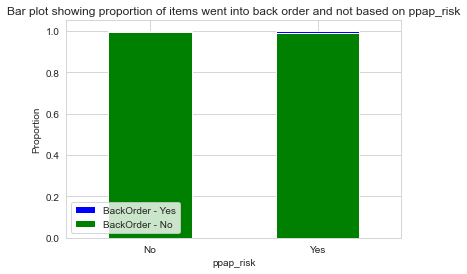

In [50]:
counts_df = data.groupby(["ppap_risk", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)
fig, ax = plt.subplots()
proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
ax.set_xlabel("ppap_risk")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on ppap_risk")
color_patches = [
    Patch(facecolor="blue", label="BackOrder - Yes"),
    Patch(facecolor="green", label="BackOrder - No")
]
ax.legend(handles=color_patches)

Also pap risk doesnt seem usefull as they have qual proportion

went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.991807  0.008193
Yes                0.992792  0.007208


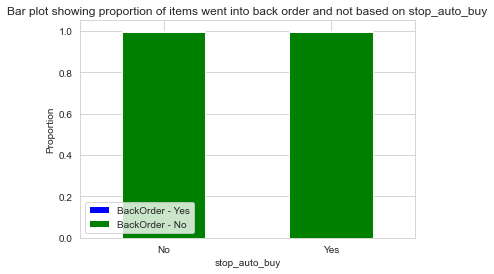

In [51]:
counts_df = data.groupby(["stop_auto_buy", "went_on_backorder"])["sku"].count().unstack()
proportions_df = counts_df.T.div(counts_df.T.sum()).T
print(proportions_df)
fig, ax = plt.subplots()
proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
ax.set_xlabel("stop_auto_buy")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on stop_auto_buy")
color_patches = [
    Patch(facecolor="blue", label="BackOrder - Yes"),
    Patch(facecolor="green", label="BackOrder - No")
]
ax.legend(handles=color_patches)

Stop auto buy also doesnt seem usefull a it has equal proportion

# plotting Co-relation Matrix

<AxesSubplot:>

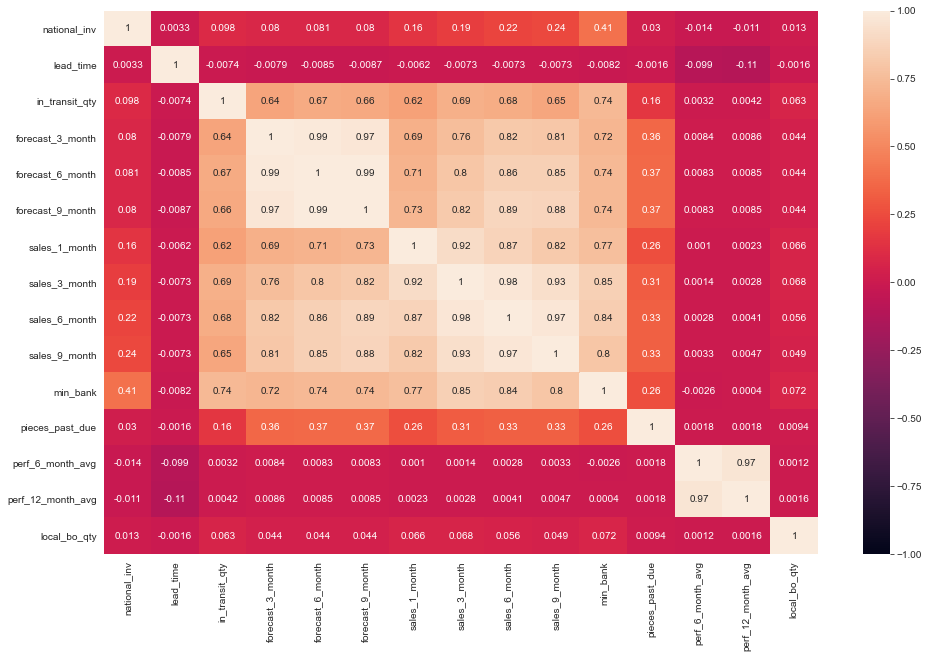

In [52]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(),vmin=-1, vmax=1,annot=True)

1. Lets move along Y axis a. In transit quantity is related to forecast, sales and min bank that is because higher sales,perfomance and min bank higher the in transit quantity, It ranges from 0.66 to 0.75
2. As seen in EDA Forecast columns of 3,6,9 have similiar dsitribution so they have interrelated high relation,It has high co-relation with sales ranging from 0.62 to 0.90
3. performance are very highly co-related with each other  with almost 0.97
4. Min_bank is highly correlate withnsales and forecast as stated earlier
5. Sales is also highly within each other as stated in EDA  from 0.82 to 0.98
6. Peices pas due is weakly correlated with sales and forecast 
7. national_inv is weakly correlated with min_bank
8. Linear Models may not perform well as many features are correlated

# Relationship Between categorical and continous Features

following implementation are reffered from https://github.com/krishnaik06/T-test-an-Correlation-using-python/blob/master/Hypothesis_Testing.ipynb

1. we will be using ANOVA test for finding relation Between Categorical and Continous features
2. ANOVA Stands for Analysis Of variance, It is used to measure if there is significance Difference Between the means of the values of the numeric variable for each categorical variable
3. Below items must be remembered about ANOVA hypothesis test

1. Null hypothesis(H0): The variables are not correlated with each other
2. P-value: The probability of Null hypothesis being true
3. Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
4. Reject Null hypothesis if P-value<0.05. Means variables are correlated


From the above box plot we can see that the distribution for each continous variable is different that means they are co-related with each other, we will use statitical method to be more sure.

 Our Target Variable is Categorical we will use Continous Vs Categorical

In [85]:
conti_col=['national_inv','lead_time','in_transit_qty','forecast_3_month','forecast_6_month','forecast_9_month','sales_1_month','sales_3_month',
           'sales_6_month','sales_9_month','pieces_past_due','perf_6_month_avg','perf_12_month_avg','local_bo_qty']
           

In [86]:
def FunctionAnova(Data, Target, List):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    Predictors=[]
    
    print('##### ANOVA Results ##### \n')
    for pred in List:
        CategoryLists=Data.groupby(pred)[Target].apply(list)
        Results = f_oneway(*CategoryLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (Results[1] < 0.05):
            print(pred, 'is correlated with', Target, '| P-Value:', Results[1])
            Predictors.append(pred)
        else:
            print(pred, 'is NOT correlated with', Target, '| P-Value:', Results[1])
    
    return(Predictors)

In [124]:
# Calling the function to check which continous variables are correlated with target
FunctionAnova(Data=data, 
              Target='went_on_backorder', 
              List=conti_col)

##### ANOVA Results ##### 



ValueError: could not convert string to float: 'No'

Categorical Vs Categorical using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True
More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [56]:
def FunctionChisq(Data, Target, List):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    Predictors=[]
    
    print('##### ChiSq Results ##### \n')
    for pred in List:
        CrossTab=pd.crosstab(index=Data[Target], columns=Data[pred])
        Result = chi2_contingency(CrossTab)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (Result[1] < 0.05):
            print(pred, 'is correlated with', Target, '| P-Value:', Result[1])
            Predictors.append(pred)
        else:
            print(pred, 'is NOT correlated with', Target, '| P-Value:', Result[1])        
            
    return(Predictors)

In [88]:
cat_col=['deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']

In [58]:
FunctionChisq(Data=data, 
              Target='went_on_backorder',
              List= cat_col)

##### ChiSq Results ##### 

deck_risk is correlated with went_on_backorder | P-Value: 5.933788521669091e-71
oe_constraint is correlated with went_on_backorder | P-Value: 1.0521651295231445e-05
ppap_risk is correlated with went_on_backorder | P-Value: 3.0994069960624216e-31
stop_auto_buy is correlated with went_on_backorder | P-Value: 0.0026469314858122623
rev_stop is NOT correlated with went_on_backorder | P-Value: 0.5205331495379879


['deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy']

# Preprocessing the Data & Feature Engineering

Converting the Categorical Data into Numerical Data

In [61]:
data.drop(['sku'],axis=1,inplace=True) #since all id are different it does not provide any additional information

KeyError: "['sku'] not found in axis"

In [90]:
# catcol=data.select_dtypes(include = ['object']).columns
for col in cat_col:
    data[col].replace({'No': 0, 'Yes': 1}, inplace=True)
    data[col] = data[col].astype(int)

Replacing -99 values in performance columns with NaN

In [91]:
data.perf_12_month_avg.replace({-99.0 : np.nan}, inplace = True)
data.perf_6_month_avg.replace({-99.0 : np.nan}, inplace = True)

In [92]:
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0,0,0,1,0,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,1,0,0,1,0,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,NaN,NaN,0.0,1,0,0,1,0,No


Finding the outliers in the data (From EDA we can draw a conclusion that there are some outliers after 90th % of the data ,Lets use the technique from NYC case study to get the insights of the data and decide a threshold to remove the outliers from the data, lets take one column from the data to get the insights

In [93]:
in_transit_qty = list(data['in_transit_qty'])
in_transit_qty.sort()
for i in range(90,101,1):
    print(i,'percentile value is',np.percentile(in_transit_qty,i))

90 percentile value is 15.0
91 percentile value is 20.0
92 percentile value is 26.0
93 percentile value is 35.0
94 percentile value is 48.0
95 percentile value is 66.0
96 percentile value is 96.0
97 percentile value is 145.0
98 percentile value is 250.0
99 percentile value is 565.0
100 percentile value is 489408.0


In [94]:
in_transit_qty.sort()
for i in np.arange(0.0,1.0,0.1):
    print('{}percentile value is {}'.format(99+i,in_transit_qty[int(len(in_transit_qty)*(float(99+i)/100))]))
print("100 percentile value is ",in_transit_qty[-1])

99.0percentile value is 565.0
99.1percentile value is 630.0
99.2percentile value is 720.0
99.3percentile value is 830.0
99.4percentile value is 990.0
99.5percentile value is 1193.0
99.6percentile value is 1500.0
99.7percentile value is 2040.0
99.8percentile value is 3000.0
99.9percentile value is 5510.0
100 percentile value is  489408.0


In [95]:
national_inv = list(data['national_inv'])
national_inv.sort()
for i in range(90,101,1):
    print(i,'percentile value is',np.percentile(national_inv,i))

90 percentile value is 360.0
91 percentile value is 417.0
92 percentile value is 490.0
93 percentile value is 577.0
94 percentile value is 722.0
95 percentile value is 924.0
96 percentile value is 1225.0
97 percentile value is 1821.0
98 percentile value is 3015.0
99 percentile value is 5487.0
100 percentile value is 12334404.0


In [96]:
national_inv=list(data['national_inv'])
national_inv.sort()
for i in np.arange(0.0,1.0,0.1):
    print('{}percentile value is {}'.format(99+i,national_inv[int(len(national_inv)*(float(99+i)/100))]))
print("100 percentile value is ",national_inv[-1])

99.0percentile value is 5487.0
99.1percentile value is 6102.0
99.2percentile value is 6910.0
99.3percentile value is 7984.0
99.4percentile value is 9360.0
99.5percentile value is 11079.0
99.6percentile value is 13650.0
99.7percentile value is 17309.0
99.8percentile value is 24574.0
99.9percentile value is 41298.0
100 percentile value is  12334404.0


In [97]:
data.forecast_3_month.quantile(0.99),data.forecast_6_month.quantile(0.99),data.forecast_9_month.quantile(0.99),data.sales_1_month.quantile(0.99),data.sales_3_month.quantile(0.99),data.sales_6_month.quantile(0.99),data.sales_9_month.quantile(0.99),data.min_bank.quantile(0.99)

(2280.0,
 4335.659999999916,
 6316.0,
 693.0,
 2229.0,
 4410.0,
 6698.0,
 679.6599999999162)

In [98]:
df=data[(data.national_inv>= 0.00)&(data.national_inv<=5487.000)&(data.in_transit_qty <=5510.00) & (data.forecast_3_month <=2280.0)\
    &(data.forecast_6_month <= 4335.660) &(data.forecast_9_month<=6316.0)&(data.sales_1_month<=693.0)&(data.sales_3_month<=2229.0)&\
    (data.sales_6_month<=4410.0)&(data.sales_9_month<=6698.0)&(data.min_bank<=679.6560)]

In [99]:
print("outliers removed :",data.shape[0]-df.shape[0])

outliers removed : 48564


# Doing X,y split and Train Test split

In [100]:
X=df.drop(['went_on_backorder'], axis=1)
y=df['went_on_backorder'].values

In [101]:
X.shape

(1881371, 21)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.10)
y

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Imputation

In [103]:
imputer = KNNImputer(n_neighbors=5)
df_train_imputed = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
df_cv_imputed= pd.DataFrame(imputer.transform(X_cv),columns = X_cv.columns)
df_test_imputed=pd.DataFrame(imputer.transform(X_test),columns = X_test.columns)

ValueError: could not convert string to float: 'No'

In [76]:
file = open('KNNimputer.pkl', 'wb')

In [77]:
with open('KNNImputer.pkl', 'wb') as file:
    pickle.dump(imputer, file)

In [78]:
df_train_imputed.to_csv(r'C:\Users\leovo\downloads\df_train_imputed.csv',index=False,header=True)
df_cv_imputed.to_csv(r'C:\Users\leovo\downloads\df_cv_imputed.csv',index=False,header=True)
df_test_imputed.to_csv(r'C:\Users\leovo\downloads\df_test_imputed.csv',index=False,header=True)

NameError: name 'df_train_imputed' is not defined

In [ ]:
df_train_imputed.head()

In [ ]:
median = X_train.median()

df_train_imputed = X_train.fillna(median)
df_cv_imputed = X_cv.fillna(median)
df_test_imputed = X_test.fillna(median)

print(df_train_imputed.shape,df_cv_imputed.shape,df_test_imputed.shape)

In [ ]:
df_train_imputed.head()

In [ ]:
file = open('imputer.pkl', 'wb')

In [ ]:
with open('imputer.pkl', 'wb') as file:
    pickle.dump(median, file)

# Getting top 5 important features

In [79]:
def featureSelection(df):
    clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,verbose=1)
    y_true = y_train
    df = X_train
    clf.fit(df,y_true)
    print(clf.feature_importances_)
    impFeatures = np.argsort(clf.feature_importances_)
    impFeatures = impFeatures[::-1]
    print(impFeatures)
    return impFeatures

In [80]:
important_features = featureSelection(df_train_imputed)

ValueError: could not convert string to float: 'No'

In [ ]:
impFeature_df = pd.DataFrame()
col_names = df.columns
for i , col in enumerate(important_features):
    impFeature_df[col_names[col]] = df[col_names[col]]
    if i == 4:
        break

In [ ]:
impFeature_df

we used random forest classifier to get thr 5 important feature so as shown above national_inv, perf_12_months_avg, perf_6_month,sales_9_months and forecast_9_month are 5 top important features so lets do some bivariate analysis on it

In [ ]:
plt.figure()
sns.pairplot(data[['national_inv', 'perf_12_month_avg', 'perf_6_month_avg', 'sales_9_month','forecast_9_month','went_on_backorder']], hue = "went_on_backorder",)
plt.show()

1. We took up top 5 important features, Since the data is highly imbalanced pairplots are not clear
2. Forecast and sales features are showing some corelation between each other
3. Lower forecast for performance of 6 month shows the chance of item going on backorder
4. low national_inv with performance upto 0.7 shows the tendency to go on backorder

# Using PCA On Imputed Data

In [81]:
pca=PCA(n_components=2)

In [82]:
train_pca=pca.fit_transform(X_train)

ValueError: could not convert string to float: 'No'

In [83]:
cv_pca=pca.transform(X_cv)

NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
test_pca=pca.transform(df_test_imputed)

In [ ]:
file = open('PCA.pkl', 'wb')

In [ ]:
with open('PCA.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [ ]:
for i in range(2):
    df_train_imputed['PCA'+str(i)]=train_pca[:,i]
    df_test_imputed['PCA'+str(i)]=test_pca[:,i]
    df_cv_imputed['PCA'+str(i)]=cv_pca[:,i]
    

# Using SVD On imputed Data

In [ ]:
svd = TruncatedSVD(n_components=2)

In [ ]:
train_svd=svd.fit_transform(df_train_imputed)

In [ ]:
cv_svd=svd.transform(df_cv_imputed)

In [ ]:
test_svd=svd.transform(df_test_imputed)

In [ ]:
file = open('SVD.pkl', 'wb')

In [ ]:
with open('SVD.pkl', 'wb') as file:
    pickle.dump(svd, file)

In [ ]:
for i in range(2):
    df_train_imputed['SVD'+str(i)]=train_svd[:,i]
    df_test_imputed['SVD'+str(i)]=test_svd[:,i]
    df_cv_imputed['SVD'+str(i)]=cv_svd[:,i]
    

In [ ]:
df_train_imputed.head()

# Discretisation Using Decision Trees

doing Hyper tunning to get optimal depth of tree

In [84]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4,5,7,8,9,10]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, X_train.sales_9_month.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4,5,7,8,9,10]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.631850     0.004135
1      2      0.663723     0.003190
2      3      0.675942     0.004996
3      4      0.680097     0.005863
4      5      0.681730     0.004112
5      7      0.681636     0.004372
6      8      0.680915     0.004462
7      9      0.679404     0.005483
8     10      0.678594     0.006065


we will keep depth 4 as it gives best score

# applying on sales_9_month

In [106]:
tree_model = DecisionTreeClassifier(max_depth=4)

In [129]:
tree_model.fit(X_train.sales_9_month.to_frame(), y_train) 

DecisionTreeClassifier(max_depth=8)

In [130]:
X_train['sales_9_tree']=tree_model.predict_proba(X_train.sales_9_month.to_frame())[:,1]

In [131]:
X_test['sales_9_tree']=tree_model.predict_proba(X_test.sales_9_month.to_frame())[:,1] 

<ipython-input-131-e92351b2faf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['sales_9_tree']=tree_model.predict_proba(X_test.sales_9_month.to_frame())[:,1]


In [132]:
X_cv['sales_9_tree']=tree_model.predict_proba(X_cv.sales_9_month.to_frame())[:,1]

In [133]:
file = open('Tree_sale.pkl', 'wb')

In [134]:
with open('Tree_sale.pkl', 'wb') as file:
    pickle.dump(tree_model, file)

# applying on forecast features

In [135]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4,5,7,8,9,10]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, X_train.forecast_9_month.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4,5,7,8,9,10]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.759654     0.003468
1      2      0.787409     0.002986
2      3      0.795481     0.002613
3      4      0.799145     0.003839
4      5      0.799427     0.003534
5      7      0.799387     0.003781
6      8      0.799260     0.003705
7      9      0.799868     0.004409
8     10      0.799570     0.004321


In [ ]:
tree_model1 = DecisionTreeClassifier(max_depth=9) #since 9 is the optimal value

In [ ]:
tree_model1.fit(df_train_imputed.forecast_9_month.to_frame(), y_train)

In [ ]:
df_train_imputed['forecast_9_tree']=tree_model1.predict_proba(df_train_imputed.forecast_9_month.to_frame())[:,1] 

In [ ]:
df_test_imputed['forecast_9_tree']=tree_model1.predict_proba(df_test_imputed.forecast_9_month.to_frame())[:,1] 

In [ ]:
df_cv_imputed['forecast_9_tree']=tree_model1.predict_proba(df_cv_imputed.forecast_9_month.to_frame())[:,1] 

In [ ]:
file = open('Tree_fore.pkl', 'wb')

In [ ]:
with open('Tree_fore.pkl', 'wb') as file:
    pickle.dump(tree_model1, file)

In [ ]:
df_test_imputed.head()

# Min-Max Scaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df_train_imputed=pd.DataFrame(scaler.fit_transform(df_train_imputed),columns=df_train_imputed.columns)
df_cv_imputed=pd.DataFrame(scaler.transform(df_cv_imputed),columns=df_cv_imputed.columns)
df_test_imputed=pd.DataFrame(scaler.transform(df_test_imputed),columns=df_test_imputed.columns)

In [ ]:
file = open('scaler.pkl', 'wb')

In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
df_train_imputed.head()

# Main Conclusion from EDA and Feature Engineering:
1. It is a binary classification with high imbalance Data
2. Data consists of both Numerical and categorical Data
3. Missing values are in the Lead_time features and performance 6 & 12 months columns consits of -99 which is replaced by NaN
4. Almost all the numerical columns had extreme skewedness (on positive side) indicating them as outliers or also can be useful data as sale , inventory , forecast of some products might be very high
5. Categorical columns consists of yes or no
6. As a part of preprocessing and Feature engineering we will drop SKU column and also we dropped last row, We alse combined train and test data together and then split it into 80:20 ratio using train test split
7. encoded target variable and dependent variable with No as 0 and Yes as 1
8. Took only 99 % of data since the data after 99 showed some high values
8. Imputed missing values with KNN imputer and stored it as imputer.csv file so that we need not run it again and again
9. We used SVD and PCA for dimentionality reduction
10. Performed Hypotesis test on differnt features to find co-relation between target and all variables
11. we got 5 important features using RF and feature extraction methods
11. Used bining as a feature engineering technique where i tried bining top 5 features and found forecast_9 and sales_9 added some value 
12. https://towardsdatascience.com/discretisation-using-decision-trees-21910483fa4b reffred this blog, i performed decision tree based bining where i did hyper parameter tuning to get the optimal value to bin the feature accordingly

# Using baseline approach

applying random or dummy model on data

In [116]:
random_clf = DummyClassifier(strategy="uniform")
random_clf.fit(X_train, y_train)
print("ROC-AUC score  : " , roc_auc_score(y_test,random_clf.predict_proba(X_test)[:, 1]))
print("Macro F1-Score : " , f1_score(y_test,random_clf.predict(X_test),pos_label = 1,average = 'macro'))

ROC-AUC score  :  0.5
Macro F1-Score :  0.3389512978243707


# Using Machine Learning Models on KNN imputed Data

# 1. Logistic Regression

In [118]:
lr=LogisticRegression(solver='liblinear',max_iter=100, class_weight= 'balanced')
param={'penalty' : ['l2'],'C': [100, 10, 1.0, 0.1, 0.01]}
grid=GridSearchCV(lr, param,cv=3,scoring = 'roc_auc' )
reports = grid.fit(X_train, y_train)
print("Best Params : " , reports.best_params_)
print("Best Score : " , reports.best_score_)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1344, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(

ValueError: could not convert string to float: 'No'

In [ ]:
lin_re=LogisticRegression(penalty='l2',C=100,solver='liblinear',max_iter=100,class_weight= 'balanced')
rep=lin_re.fit(df_train_imputed, y_train)

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_train_pred1 = lin_re.predict_proba(df_train_imputed) [:,1]
y_test_pred1 = lin_re.predict_proba(df_test_imputed) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_train,lin_re.predict(df_train_imputed))

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("F1 score on Test data :",f1_score(y_test, lin_re.predict(df_test_imputed),average = 'macro'))

In [ ]:
# predict probabilities
lr_probs = lin_re.predict_proba(df_test_imputed)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = lin_re.predict(df_test_imputed)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat,average = 'macro'), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='logistic Regression')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred=lin_re.predict(df_test_imputed)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision : %.3f' % precision)

In [ ]:
y_pred=lin_re.predict(df_test_imputed)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

# 2. RandomForest Classifier 

In [ ]:
rf = RandomForestClassifier(class_weight = "balanced_subsample" , n_jobs = -1)
param = {'n_estimators' : [10,100,500,700] , 'max_depth' : [10,20,50],'min_samples_split' : [2,5,10]}
clf = GridSearchCV(rf, param,scoring = 'roc_auc' ) #hyper parameter tunning
results = clf.fit(df_train_imputed, y_train)
print("Best Params : " , results.best_params_)
print("Best Score : " , results.best_score_)

In [ ]:
model= RandomForestClassifier(n_estimators=500,max_depth=50,min_samples_split=5,class_weight = "balanced_subsample" , n_jobs = -1)
result=model.fit(df_train_imputed, y_train)

In [ ]:
file = open('bestmodel.pkl', 'wb')

In [ ]:
with open('bestmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_train_pred1 = model.predict_proba(df_train_imputed) [:,1]
y_test_pred1 = model.predict_proba(df_test_imputed) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_train,model.predict(df_train_imputed))

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("F1 score on Test data :",f1_score(y_test, model.predict(df_test_imputed),average = 'macro'))

In [ ]:
y_pred=model.predict(df_test_imputed)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision : %.3f' % precision)

In [ ]:
y_pred=model.predict(df_test_imputed)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

In [ ]:
feat_importances = pd.Series(result.feature_importances_, index=df_train_imputed.columns)
feat_importances.plot(kind='barh',figsize=(10, 8))

In [ ]:
# predict probabilities
lr_probs = model.predict_proba(df_test_imputed)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(df_test_imputed)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat,average = 'macro'), auc(lr_recall, lr_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# 3. AdaBoost classifier

In [ ]:
model1 = AdaBoostClassifier()
parameters = {'n_estimators' : [10,100,500,1000]}
clf = GridSearchCV(model1, parameters,scoring = 'roc_auc' )
res = clf.fit(df_train_imputed, y_train)
print("Best Params : " , res.best_params_)
print("Best Score : " , res.best_score_)

In [ ]:
model1= AdaBoostClassifier(n_estimators=1000)
res=model1.fit(df_train_imputed, y_train)

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_train_pred1 = model1.predict_proba(df_train_imputed) [:,1]
y_test_pred1 = model1.predict_proba(df_test_imputed) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred1)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_train,model1.predict(df_train_imputed))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("F1 score on Test data :",f1_score(y_test, model1.predict(df_test_imputed),average = 'macro'))

In [ ]:
y_pred=model1.predict(df_test_imputed)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision : %.3f' % precision)

In [ ]:
y_pred=model1.predict(df_test_imputed)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

In [ ]:
feat_importances = pd.Series(res.feature_importances_, index=df_train_imputed.columns)
feat_importances.plot(kind='barh',figsize=(10, 8))

In [ ]:
# predict probabilities
lr_probs = model1.predict_proba(df_test_imputed)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model1.predict(df_test_imputed)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat,average = 'macro'), auc(lr_recall, lr_precision)
# summarize scores
print('AdaBoost: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='AdaBoost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# 4. GBDT

In [ ]:
GBDT =  GradientBoostingClassifier()
parameters = {'max_depth' : [5], 'n_estimators' : [5,100,500]}
clf = GridSearchCV(GBDT,parameters,scoring = 'roc_auc',verbose=10,return_train_score=True )
gs = clf.fit(df_train_imputed, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

In [ ]:
GBDT= GradientBoostingClassifier(max_depth=5,n_estimators=500)
res1 = GBDT.fit(df_train_imputed, y_train)

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_train_pred1 = ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_train_pred1 = GBDT.predict_proba(df_train_imputed) [:,1]
y_test_pred1 = GBDT.predict_proba(df_test_imputed) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred1)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_train,GBDT.predict(df_train_imputed))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
feat_importances = pd.Series(res1.feature_importances_, index=df_train_imputed.columns)
feat_importances.plot(kind='barh',figsize=(10, 8))

In [ ]:
# predict probabilities
lr_probs = GBDT.predict_proba(df_test_imputed)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = GBDT.predict(df_test_imputed)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat,average = 'macro'), auc(lr_recall, lr_precision)
# summarize scores
print('GBDT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='GBDT')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print("F1 score on Test data :",f1_score(y_test, GBDT.predict(df_test_imputed),average = 'macro'))

In [ ]:
y_pred=GBDT.predict(df_test_imputed)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision : %.3f' % precision)

In [ ]:
y_pred=GBDT.predict(df_test_imputed)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

# Stacking Classifier

using values from above hypertunned parameters and applying stacking classifier

In [ ]:
clf1 = GradientBoostingClassifier(max_depth=5,n_estimators=500)
clf2 = RandomForestClassifier(n_estimators=700,max_depth=9,class_weight = "balanced_subsample")
clf3 = AdaBoostClassifier(n_estimators=1000)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          use_probas=False,
                          average_probas=False,
                          meta_classifier=lr)

sclf.fit(df_train_imputed, y_train)
y_train_pred = sclf.predict(df_train_imputed)
print("Train F1 score:", f1_score(y_train, y_train_pred, average='macro'))
y_cv_pred = sclf.predict(df_cv_imputed)
print("CV F1 score:", f1_score(y_cv, y_cv_pred, average='macro'))
y_test_pred = sclf.predict(df_test_imputed)
print("Test F1 score:", f1_score(y_test, y_test_pred, average='macro'))

In [ ]:
cf_matrix = confusion_matrix(y_train,sclf.predict(df_train_imputed))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_train_pred1 = ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_train_pred1 = sclf.predict_proba(df_train_imputed) [:,1]
y_test_pred1 = sclf.predict_proba(df_test_imputed) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred1)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [ ]:
y_pred=sclf.predict(df_test_imputed)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision : %.3f' % precision)

In [ ]:
y_pred=sclf.predict(df_test_imputed)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

In [ ]:
lr_probs = sclf.predict_proba(df_test_imputed)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = sclf.predict(df_test_imputed)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat,average = 'macro'), auc(lr_recall, lr_precision)
# summarize scores
print('Stacking Classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Stacking Classifier')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Ensemble Model(Median Imputation)

In [ ]:
X=df.drop(['went_on_backorder'],axis=1)

In [ ]:
y=df['went_on_backorder']

In [ ]:
X_train, X_ensemble_test, y_train, y_ensemble_test = train_test_split(X, y, stratify=y, test_size=0.2)
d1, d2, y_d1, y_d2 = train_test_split(X_train, y_train, stratify=y_train, test_size=0.5)
print(d1.shape, d2.shape, X_ensemble_test.shape)

In [ ]:
median_val = d1.median()
columns = d1.columns
d1 = d1.fillna(median_val)
d2 = d2.fillna(median_val)
X_ensemble_test = X_ensemble_test.fillna(median_val)
print(d1.shape, d2.shape, X_ensemble_test.shape)

In [ ]:
d1 = pd.DataFrame(d1,columns = columns)
d2 = pd.DataFrame(d2,columns = columns)
X_ensemble_test = pd.DataFrame(X_ensemble_test,columns = columns)

In [ ]:
pca=PCA(n_components=2)
d1PCA=pca.fit_transform(d1)
d2PCA=pca.transform(d2)
X_testPCA=pca.transform(X_ensemble_test)

In [ ]:
svd = TruncatedSVD(n_components=2)
d1SVD = svd.fit_transform(d1)
d2SVD = svd.transform(d2)
X_testSVD = svd.transform(X_ensemble_test)

In [ ]:
for i in range(2):
    d1['PCA'+str(i)]=d1PCA[:,i]
    d2['PCA'+str(i)]=d2PCA[:,i]
    X_ensemble_test['PCA'+str(i)]=X_testPCA[:,i]

In [ ]:
for i in range(2):
    d1['SVD'+str(i)]=d1SVD[:,i]
    d2['SVD'+str(i)]=d2SVD[:,i]
    X_ensemble_test['SVD'+str(i)]=X_testSVD[:,i]

In [ ]:
tree_model4 = DecisionTreeClassifier(max_depth=4)

In [ ]:
tree_model4.fit(d1.sales_9_month.to_frame(), y_d1)

In [ ]:
d1['sales_9_tree']=tree_model4.predict_proba(d1.sales_9_month.to_frame())[:,1] 
d2['sales_9_tree']=tree_model4.predict_proba(d2.sales_9_month.to_frame())[:,1] 
X_ensemble_test['sales_9_tree']=tree_model4.predict_proba(X_ensemble_test.sales_9_month.to_frame())[:,1] 

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=9)

In [ ]:
tree_model.fit(d1.forecast_9_month.to_frame(), y_d1)

In [ ]:
with open('tree_forecast.pkl', 'wb') as file:
    pickle.dump(tree_model, file)

In [ ]:
d1['forecast_9_tree']=tree_model.predict_proba(d1.forecast_9_month.to_frame())[:,1]
d2['forecast_9_tree']=tree_model.predict_proba(d2.forecast_9_month.to_frame())[:,1]
X_ensemble_test['forecast_9_tree']=tree_model.predict_proba(X_ensemble_test.forecast_9_month.to_frame())[:,1] 

In [ ]:
minmax = MinMaxScaler()
columns =d1.columns
d1 = pd.DataFrame(minmax.fit_transform(d1),columns = columns)
d2 = pd.DataFrame(minmax.transform(d2),columns = columns)
X_ensemble_test = pd.DataFrame(minmax.transform(X_ensemble_test),columns = columns)

print(d1.shape,d2.shape,X_ensemble_test.shape)

In [ ]:
# Generate samples of dataset with 60% sample and 40% sample with replacement.
#https://stackoverflow.com/questions/23455728/scikit-learn-balanced-subsampling
def samplingwithreplacement(input_data, target_data):     
    selected_rows = random.sample(range(0,len(input_data)-1), int(0.6*(len(input_data))))
    sampled_input_data = input_data.iloc[selected_rows]
    sampled_target_data = target_data.iloc[selected_rows]

    sampled_input_data = sampled_input_data.values.tolist()
    sampled_target_data = sampled_target_data.values.tolist()

    row_replication = random.sample(range(0,len(sampled_input_data)-1), int(0.4*(len(input_data))))
    for i in row_replication:
        sampled_input_data.append(sampled_input_data[i])
        sampled_target_data.append(sampled_target_data[i])

    return sampled_input_data, sampled_target_data

In [ ]:
def ensemble_model_DT(num_of_models, dataset_d1, y_d1, dataset_d2, y_d2):
    list_input_data = []
    list_output_data = []
    model_list = []
    output_list = []
    final_df = []

 # Generate samples of dataset with 60% sample and 40% sample with replacement.
    for i in range(num_of_models):
        in_data,target_data = samplingwithreplacement(dataset_d1, y_d1)
        list_input_data.append(in_data)
        list_output_data.append(target_data)
    print("Generating Samples Done")

 # Fit DT models on the generated samples
    for i in range(num_of_models):
        dtr = DecisionTreeRegressor(max_depth=None)
        model = dtr.fit(list_input_data[i], list_output_data[i])
        model_list.append(model)
    print("Fitting Base Models Done")

 # predict values for the second dataset and use it as features for the next meta_data model
    for i in range(num_of_models):
        model = model_list[i]
        output = model.predict(dataset_d2)
        output_list.append(output)
    print("Predict on Dataset 2 Done")

 # Zip each row of the columns to form a dataset
    for i in range(len(output_list[0])):
        output = []
        for j in range(num_of_models):
            output.append(output_list[j][i])
        final_df.append(output)
    print("Formed Meta Dataset Done")

    final_df = pd.DataFrame(final_df)

    return model_list, final_df

In [ ]:
num_of_models = 15
model_list, df = ensemble_model_DT(num_of_models,d1,y_d1,d2,y_d2)

Meta Classifier

In [ ]:
LR = LogisticRegression()
params = {'C':[10**x for x in range(-5,4)]}
grid_log_clf = GridSearchCV(LR,param_grid=params,n_jobs=-1,scoring='f1_macro',verbose=3,return_train_score=True)
grid_log_clf.fit(df,y_d2.values.ravel())

In [ ]:
labels = grid_log_clf.cv_results_['params']
x_axis = range(1,10)
y_axis = grid_log_clf.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("GRID search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
grid_log_clf.best_estimator_

In [ ]:
clf_best = LogisticRegression(C=10)
clf_best.fit(df,y_d2.values.ravel())

In [ ]:
def perform_test(number_of_models,clf_list,X_ensemble_test):
    test_output_list=[]
    test_data = []

    for num in range(number_of_models):
        clf = clf_list[num]
        output = clf.predict(X_ensemble_test)
        test_output_list.append(output)

    for i in range(len(test_output_list[0])):
        outp=[]
        for j in range(number_of_models):
            outp.append(test_output_list[j][i])
        test_data.append(outp)
    test_data = pd.DataFrame(test_data)

    return test_data

In [ ]:
test_data = perform_test(num_of_models,model_list,X_ensemble_test)
y_test_pred = clf_best.predict(test_data)

In [ ]:
print("Test F1 score : ",f1_score(y_ensemble_test,y_test_pred,average='macro'))

In [ ]:
print('Test Recall :',recall_score(y_ensemble_test, y_test_pred, average='binary'))

In [ ]:
cf_matrix = confusion_matrix(y_ensemble_test,y_test_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "Models", "Hyperparameters", "Train AUC", "Test AUC","F1 Score(Macro)"]
x.add_row(["Logistic regression", "(C: 100,penalty: l2)",0.8994655726174224,0.8957184538682008,0.4737408651800473])
x.add_row(["Random Forest", "(max_depth: 9,n_estimators: 500)",0.9986814880078766,0.9519718727897089,0.630958477119113])
x.add_row(["Adaboost", "(n_estimators: 1000)", 0.944499727323055, 0.9351268615103472,0.5305576243005983])
x.add_row(["GBDT", "(max_depth: 5,n_estimators: 500)",0.9629101427431976,0.9490599824634047,0.5621231920584562])
x.add_row(["Stacking Classifier", "Used Hyperparameters from above",0.9069016583521106,0.8777509796745835,0.5594177322312742])
x.add_row(["Custom Ensembles(DTR)", "C:10 (Logistic Regression)",'--','--',0.6185345411321528])

print(x)

# Conclusion

1. Logistic regression is least performing from all
2. Random forest shows good score with F1 score of 0.63
3. Adaboost shows better performance than RF and it has F1 score greater than RF(0.53)
4. GBDT is performing good with F1 score upto 0.56
5. Stacking classifiers also show similar performance but slightly lower than GBDT
6. Custom Ensembles with DecisionTree Regressor with  F1 score of 0.62